In [7]:
import numpy as np
#from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import configparser
import sys
import os
import matplotlib.animation as animation
import pstats

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
#%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

# Análisis de performance del algoritmo genético

Se estudian los tiempos de ejecución del algoritmo. Como lo que nos interesa son los tiempos de cómputo de cada función, no hace falta hacer muchas iteraciones. Es decir, no buscamos encontrar el valor óptimo. Se anulan las condiciones de saturación y tolerancia así no corta si encuentra un buen valor.

Se realizan 8 generaciones para tamaños: 8,16,32,64 y 128.

In [3]:
dimensions = [8,16,32,64,128]

# Define the parent directory containing subdirectories
parent_dir = "stats_001"

# List subdirectories (sorted to maintain order)
cumulative_times_fitness = []
total_times_fitness = []

# Process each directory
for idx, directory in enumerate(n16_directories):

    dir_path = os.path.join(parent_dir, directory)
    prof_files = [f for f in os.listdir(dir_path) if f.endswith(".prof")]
    summary_files = [f for f in os.listdir(dir_path) if f.__contains__("summary")]

    if len(prof_files) != 1:
        print(f"Skipping {directory}: expected one .prof file, found {len(prof_files)}.")
        continue
    if len(summary_files) != 1:
        print(f"Skipping {directory}: expected one summary file, found {len(summary_files)}.")
        continue
    
    prof_file = os.path.join(dir_path, prof_files[0])
    summary_file = os.path.join(dir_path, summary_files[0])
    n16_summary = pd.concat([n16_summary, pd.read_csv(summary_file)], ignore_index=True)
    # Load profile stats
    stats = pstats.Stats(prof_file)

    # Get fitness function stats
    function_names = [func for func in stats.stats.keys() if "reward_based_fitness" in func[2]]
    func_stats = stats.stats[function_names[0]]
    ncalls, nprimitive, total_time, cumulative_time, callers = func_stats
    cumulative_times_fitness.append(cumulative_time/ncalls)
    total_times_fitness.append(total_time/ncalls)

n16_summary['pop_size'] = popsizes

# Plot total time
plt.figure(figsize=(10, 6))
plt.plot(popsizes, total_times_fitness, marker="o", label="Total Time")
plt.xlabel("Directory Index")
plt.ylabel("Total Time")
plt.title("Total time for fitness function by Directory")
plt.grid()
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.legend()
plt.show()

# Plot total time
plt.figure(figsize=(10, 6))
plt.plot(popsizes, cumulative_times_fitness, marker="o", label="Total Time")
plt.xlabel("Directory Index")
plt.ylabel("Time")
plt.title("Cumulative time for fitness function by Directory")
plt.grid()
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(n16_summary['pop_size'], n16_summary['total_time_mean'], yerr=n16_summary['total_time_std'], fmt='o', label="Total Time")



['n8_profiling_001', 'n16_profiling_001', 'n32_profiling_001', 'n64_profiling_001', 'n128_profiling_001']


FileNotFoundError: [Errno 2] No such file or directory: 'stats_001/n8_profiling_001'

In [ ]:
stats.print_stats()    

Wed Jan 22 17:18:24 2025    stats_001/n128_profiling_001/profile_results.prof

         286768145 function calls (280368141 primitive calls) in 256.898 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <frozen _collections_abc>:315(__subclasshook__)
      3/1    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
     4628    0.001    0.000    0.003    0.000 <frozen abc>:117(__instancecheck__)
     4628    0.001    0.000    0.001    0.000 {built-in method _abc._abc_instancecheck}
      3/1    0.000    0.000    0.000    0.000 {built-in method _abc._abc_subclasscheck}
       80    0.005    0.000    0.005    0.000 {built-in method time.sleep}
       59    0.000    0.000    0.000    0.000 {method 'acquire' of '_thread.RLock' objects}
       59    0.000    0.000    0.000    0.000 {method 'release' of '_thread.RLock' objects}
       80    0.000    0.000    0.000    

In [ ]:
for func, func_stats in stats.stats.items():
    if "implement_array_function" in func[2]:
        ncalls, nprimitive, total_time, cumulative_time, callers = func_stats

        print(f"Function: {func}")
        print(f"Number of calls: {ncalls}")
        print(f"Primitive calls: {nprimitive}")
        print(f"Total time (self time): {total_time:.6f} seconds")
        print(f"Cumulative time: {cumulative_time:.6f} seconds")
        print(f"Callers: {callers}")
    

In [5]:
print(n16_summary)

   chain_length  total_time_mean  total_time_std  max_memory_increment_mean  \
0            16         4.034106        0.096178                   0.063875   
1            16         8.233787        0.111393                   0.070875   
2            16        17.039633        1.200314                   0.114625   

   max_memory_increment_std  min_memory_mean  min_memory_std  max_memory_mean  \
0                  0.154639       187.830250       17.255914       187.909016   
1                  0.161359       256.918750       33.755636       257.066641   
2                  0.277445       385.057313       63.959572       385.356562   

   max_memory_std  pop_size  
0       17.121382       256  
1       33.493309       512  
2       63.433449      1024  


In [ ]:
print(14.584+2.731)

17.314999999999998


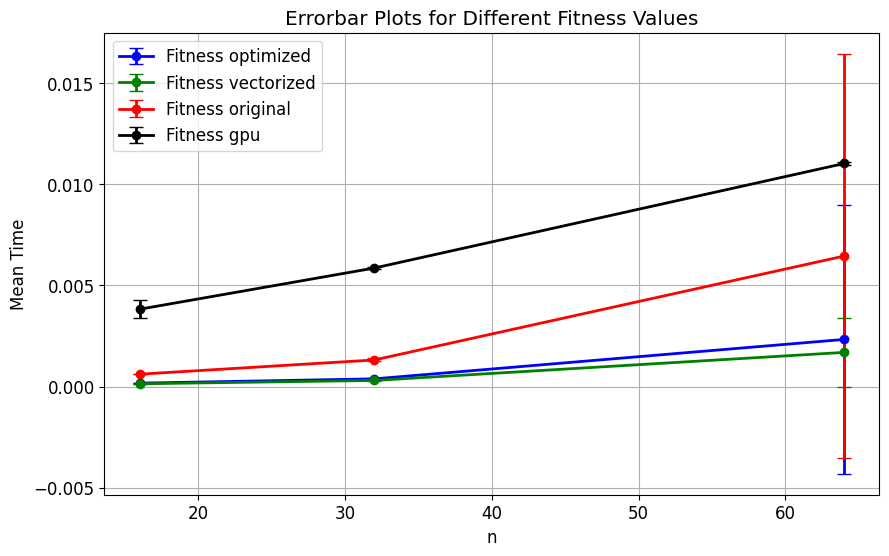

In [14]:

# Load the CSV file
csv_file = "comparing_functions.csv"
df = pd.read_csv(csv_file)

# Assuming the CSV has columns: 'n', 'fitness', 'mean', 'std'
fitness_values = df['fitness'].unique()

plt.figure(figsize=(10, 6))

# Plot for each fitness value
for fitness in fitness_values:
    subset = df[df['fitness'] == fitness]
    n = subset['chain_length']
    mean = subset['mean_time']
    std = subset['std']
    plt.errorbar(n, mean, yerr=std, fmt='o-', label=f'Fitness {fitness}', capsize=5)

plt.xlabel('n')
plt.ylabel('Mean Time')
plt.title('Errorbar Plots for Different Fitness Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.figure